In [1]:
import numpy as np
import matplotlib.pyplot as plt

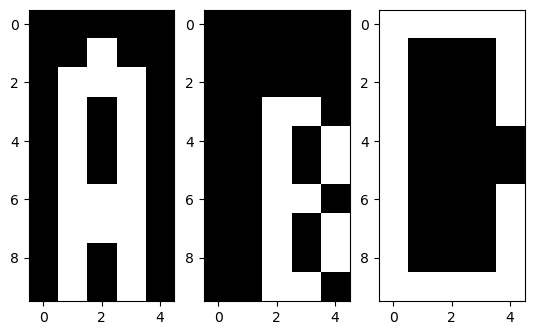

In [2]:
A = np.array([
    
   [0,0,0,0,0],
   [0,0,1,0,0],
   [0,1,1,1,0],
   [0,1,0,1,0],
   [0,1,0,1,0],
   [0,1,0,1,0],
   [0,1,1,1,0],
   [0,1,1,1,0],
   [0,1,0,1,0],
   [0,1,0,1,0]
   ])

B = np.array([

   [0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,1,1,0],
   [0,0,1,0,1],
   [0,0,1,0,1],
   [0,0,1,1,0],
   [0,0,1,0,1],
   [0,0,1,0,1],
   [0,0,1,1,0]
   ])

C=np.array([
    
   [1,1,1,1,1],
   [1,0,0,0,1],
   [1,0,0,0,1],
   [1,0,0,0,1],
   [1,0,0,0,0],
   [1,0,0,0,0],
   [1,0,0,0,1],
   [1,0,0,0,1],
   [1,0,0,0,1],
   [1,1,1,1,1]
   ])

C_noise=np.array([
    
   [0,0,1,0,1],
   [1,1,0,1,1],
   [1,0,0,1,1],
   [1,0,1,0,1],
   [0,0,0,0,0],
   [1,0,0,0,0],
   [0,0,0,0,1],
   [1,0,1,0,1],
   [1,1,0,1,0],
   [1,0,1,0,0]
   ])


figure, axis= plt.subplots(1,3) 
axis[0].imshow(A, cmap="gray")
axis[1].imshow(B, cmap="gray")
axis[2].imshow(C, cmap="gray")

In [ ]:
a = A.reshape((1,50))
b = B.reshape((1,50))
c = C.reshape((1,50))
C_noise = C_noise.reshape((1,50))


a = a / np.linalg.norm(a)
b = b / np.linalg.norm(b)
c = c / np.linalg.norm(c)
C_noise = C_noise / np.linalg.norm(C_noise)

In [3]:
def set_weights():
    W = np.zeros((50,50))
    return W

In [4]:
def calculate_output(inp, W):
    y = np.dot(inp,W.T)
    return y

In [5]:
def update_wieghts(W,inp,y):
    delta_W = np.dot(inp.T,y)
    W = W + delta_W
    return W

In [6]:
weights = set_weights()
weights = update_wieghts(weights,a,a)
weights = update_wieghts(weights,b,b)
weights = update_wieghts(weights,c,c)

In [7]:
w_max = weights.max()
w_min = weights.min()

weights = ((weights)-(w_min))/(w_max - w_min)

In [8]:
out_a = calculate_output(a,weights).reshape((10,5))
out_b = calculate_output(b,weights).reshape((10,5))
out_c = calculate_output(c,weights).reshape((10,5))
out_C_noise = calculate_output(C_noise,weights).reshape((10,5))

In [9]:
def square_error_loss(y_true, y_pred):
    return (y_true - y_pred) ** 2

In [10]:
def mean_square_error(y_true, y_pred):
    return np.sum(square_error_loss(y_true, y_pred)) / (y_true.shape[0]*y_true.shape[1])

In [11]:
print('MSE for A:'+str(mean_square_error(A,out_a/out_a.max())))
print('MSE for B:'+str(mean_square_error(B,out_b/out_b.max())))
print('MSE for C:'+str(mean_square_error(C,out_c/out_c.max())))
print('MSE for C with noise:'+str(mean_square_error(C,out_C_noise/out_C_noise.max())))

MSE for A:0.04193702615941536
MSE for B:0.02906574394463667
MSE for C:0.04336273780422999
MSE for C with noise:0.10825363674899967


([<matplotlib.axis.XTick at 0x7fa77262dd90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

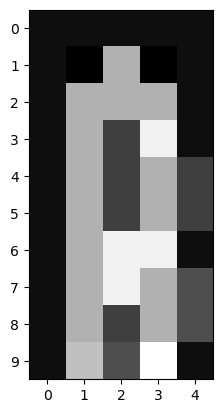

In [12]:
plt.imshow(out_a, 
           interpolation='nearest',
           cmap = 'gray'              
          )
plt.yticks(range(10))
plt.xticks(range(5))

([<matplotlib.axis.XTick at 0x7fa77269fa00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

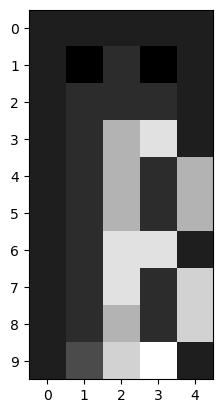

In [13]:
plt.imshow(out_b,    
           interpolation='nearest',
           cmap = 'gray',             
          )
plt.yticks(range(10))
plt.xticks(range(5))


([<matplotlib.axis.XTick at 0x7fa7727cdbe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

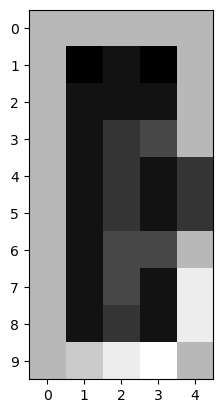

In [14]:
plt.imshow(out_c,    
           interpolation='nearest',
           cmap = 'gray',             
          )
plt.yticks(range(10))
plt.xticks(range(5))

([<matplotlib.axis.XTick at 0x7fa7731654f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

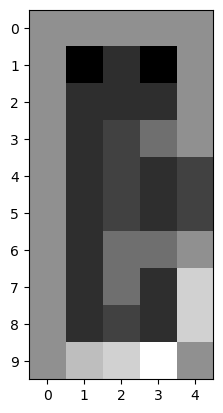

In [15]:
plt.imshow(out_C_noise,    
           interpolation='nearest',
           cmap = 'gray',             
          )
plt.yticks(range(10))
plt.xticks(range(5))